# 클러스터링 이미지 저장

In [2]:
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import adjusted_rand_score
import pickle
import os
import shutil


video_name = 'TBBT_best'
pkl_name = 'embeddings'

video_info_path = f'./processed_videos/annotation/{video_name}.json'
src_dir = f'./processed_videos/{video_name}'
dest_dir = f'./output_scenes/{video_name}'
pkl_path = f'./input/{pkl_name}.pkl'
pkl_obj = open(pkl_path, 'rb')
pkl_data = pickle.load(pkl_obj)
pkl_obj.close()
embeddings_raw=pkl_data[video_name] 
embeddings = [np.squeeze(np.array(row[0])) for row in embeddings_raw]
embeddings = np.array(embeddings)

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0, )
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_

print(cluster_labels)

[1 4 1 1 1 4 1 1 0 1 1 4 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 4 4 4 4 4
 4 4 4 4 4 2 4 4 4 4 4 4 4 4 1 1 1 1 0 1 4 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3]


In [3]:
import json

with open(video_info_path, 'rb') as f:
            video_info = json.load(f)

gt_labels = []
for info in video_info["train"]:
            imdb = info['name']
            for shot in info['label']:
                gt_labels.append(int(shot[1]))
gt_labels = np.array(gt_labels)

print(gt_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4]


In [4]:
ari = adjusted_rand_score(gt_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4}")

# masked - 0.3166
# no mask - 0.5079
# cos-sim - 0.4374

Adjusted Rand Index (ARI): 0.7269


In [5]:
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)
    for i in range(optimal_k):
        clusters_dir = os.path.join(dest_dir, str(i))
        os.makedirs(clusters_dir)

    index = 0
    for file in sorted(os.listdir(src_dir)):
        if file.endswith("0.jpg"):
            label = cluster_labels[index]
            src_file = os.path.join(src_dir, file)
            dest_file = os.path.join(f"{dest_dir}/{label}", file)
            shutil.copy(src_file, dest_file)
            index+=1
else:
    print("Directory already exists.")

# 클러스터 결과 확인

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [7]:
video_name = 'TBBT_best'
src_dir = f'./processed_videos/{video_name}'
dest_dir = f'./output/{video_name}'

#1
pkl_name = 'embeddings'
pkl_path = f'./input/{pkl_name}.pkl'
pkl_obj = open(pkl_path, 'rb')
pkl_data = pickle.load(pkl_obj)

#2
pkl_name_0 = 'no_mask'
pkl_path_0 = f'./input/{pkl_name_0}.pkl'
pkl_obj_0 = open(pkl_path_0, 'rb')
pkl_data_0 = pickle.load(pkl_obj_0)

pkl_obj.close()
pkl_obj_0.close()

In [8]:
#1
embeddings_raw=pkl_data[video_name] 
embeddings = [np.squeeze(np.array(row[0])) for row in embeddings_raw]
embeddings = np.array(embeddings)

#2
embeddings_raw_0=pkl_data_0[video_name] 
embeddings_0 = [np.squeeze(np.array(row[0])) for row in embeddings_raw_0]
embeddings_0 = np.array(embeddings_0)

In [9]:
#1
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_tsne = tsne.fit_transform(embeddings)
print(embeddings_tsne.shape)

#2
tsne = TSNE(n_components=2, random_state=0)
embeddings_tsne_0 = tsne.fit_transform(embeddings_0)
print(embeddings_tsne_0.shape)

(186, 2)
(186, 2)


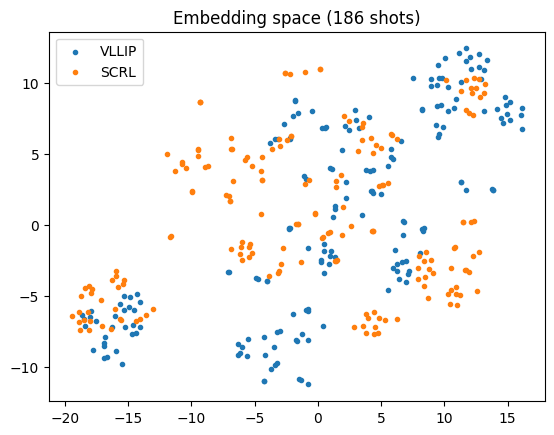

In [10]:
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], marker='.', label="VLLIP")
plt.scatter(embeddings_tsne_0[:, 0], embeddings_tsne_0[:, 1], marker='.', label="SCRL")
plt.title(f"Embedding space ({len(embeddings_tsne)} shots)")
plt.legend()
plt.show()